In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **EDA for the Train Data**

In [2]:
data = pd.read_csv(r"D:\Other Involment\Data Science\American_express_project_repo\American_Express_Project\Raw Data\663e2b6d54457_train_data_with_samplefeatures.csv")

In [3]:
data.head(3)

,match id,team1,team1_id,team1_roster_ids,team2,team2_id,team2_roster_ids,winner,winner_id,toss winner,...,match_dt,lighting,series_name,season,ground_id,team_count_50runs_last15,team_winp_last5,team1only_avg_runs_last15,team1_winp_team2_last15,ground_avg_runs_last15
0,9331181,Ba,11283,9373356.0:7857520.0:4232164.0:4566540.0:329940...,Hl Ph,12634,3500958.0:4231751.0:2735081.0:2035102.0:369833...,Hl Ph,12634,Hl Ph,...,2022-10-20,day/night match,Sd Mq Ai Ty,2022/23,7398,1.666667,0.672131,139.000000,100.0,157.178571
1,8797060,Ed,20,2089079.0:6139370.0:2076192.0:62432.0:2083409....,Wt Is,41,4690258.0:4069666.0:4230127.0:1942317.0:161392...,Ed,20,Wt Is,...,2022-01-23,day/night match,Ed tr of Wt Is,2021/22,1406,1.285714,1.952381,156.000000,50.0,103.500000
2,9433269,We,10576,3298427.0:2288789.0:7773338.0:3519011.0:368195...,Ne,8987,4003390.0:1749075.0:1626526.0:4172447.0:551672...,We,10576,Ne,...,2023-06-02,day/night match,Vy Bt,2023,251,0.857143,0.672131,173.266667,0.0,154.333333


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948 entries, 0 to 947
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   match id                   948 non-null    int64  
 1   team1                      948 non-null    object 
 2   team1_id                   948 non-null    int64  
 3   team1_roster_ids           948 non-null    object 
 4   team2                      948 non-null    object 
 5   team2_id                   948 non-null    int64  
 6   team2_roster_ids           948 non-null    object 
 7   winner                     948 non-null    object 
 8   winner_id                  948 non-null    int64  
 9   toss winner                948 non-null    object 
 10  toss decision              948 non-null    object 
 11  venue                      948 non-null    object 
 12  city                       948 non-null    object 
 13  match_dt                   948 non-null    object 

In [5]:

# First, filter the DataFrame to get rows where ground_avg_runs_last15 is 0
zero_ground_avg_runs = data[data['ground_avg_runs_last15'].isna() == True]


# Now, count the unique ground_id entries in this filtered DataFrame
unique_ground_ids = zero_ground_avg_runs['ground_id'].nunique()

print(f'The number of unique ground_id entries with 0 or NaN value ground_avg_runs_last15 is: {unique_ground_ids}')


The number of unique ground_id entries with 0 or NaN value ground_avg_runs_last15 is: 51


In [6]:

# Filter out the rows where ground_avg_runs_last15 is not null
non_null_ground_avg = data[~data['ground_avg_runs_last15'].isnull()]

# Get the unique ground_id values from the original DataFrame
all_ground_ids = data['ground_id'].unique()

# Get the unique ground_id values from the non-null ground_avg_runs_last15 DataFrame
non_null_ground_ids = non_null_ground_avg['ground_id'].unique()

# Find the ground_ids that are in all_ground_ids but not in non_null_ground_ids
no_data_ground_ids = set(all_ground_ids) - set(non_null_ground_ids)

# Get the number of unique ground_id values with no data
num_no_data_ground_ids = len(no_data_ground_ids)

print(no_data_ground_ids)
print(f'The number of unique ground_id entries without any ground_avg_runs_last15 data is: {num_no_data_ground_ids}')


{17632, 4416, 17765, 5382, 19718, 16806, 7475, 2932, 6579, 14265, 24828, 17373}
The number of unique ground_id entries without any ground_avg_runs_last15 data is: 12


In [7]:
print(len(data['ground_id'].unique()))
data.groupby(by='ground_id')['ground_avg_runs_last15'].describe()

123


,count,mean,std,min,25%,50%,75%,max
ground_id,,,,,,,,
83,11.0,143.870546,1.985872,141.000000,142.333333,143.333333,145.566667,146.312500
251,16.0,152.934833,5.586571,144.366667,147.992308,153.116667,157.550000,160.666667
328,16.0,143.746545,7.801399,133.909091,137.037775,142.283333,146.908333,160.533333
342,10.0,162.754655,3.679496,158.500000,159.811905,161.595833,165.292045,168.437500
440,17.0,160.463110,3.791752,154.400000,156.850000,161.200000,163.178571,166.066667
...,...,...,...,...,...,...,...,...
23841,13.0,147.677977,4.368367,142.607143,143.833333,148.000000,149.800000,156.928571
24044,6.0,148.908333,5.953185,142.000000,145.525000,147.500000,151.500000,158.750000
24254,3.0,152.861111,5.942043,147.500000,149.666667,151.833333,155.541667,159.250000


In [8]:
print(len(data['team1_id'].unique()))
print(len(data['team2_id'].unique()))
print(len(data['winner_id'].unique()))

152
150
139


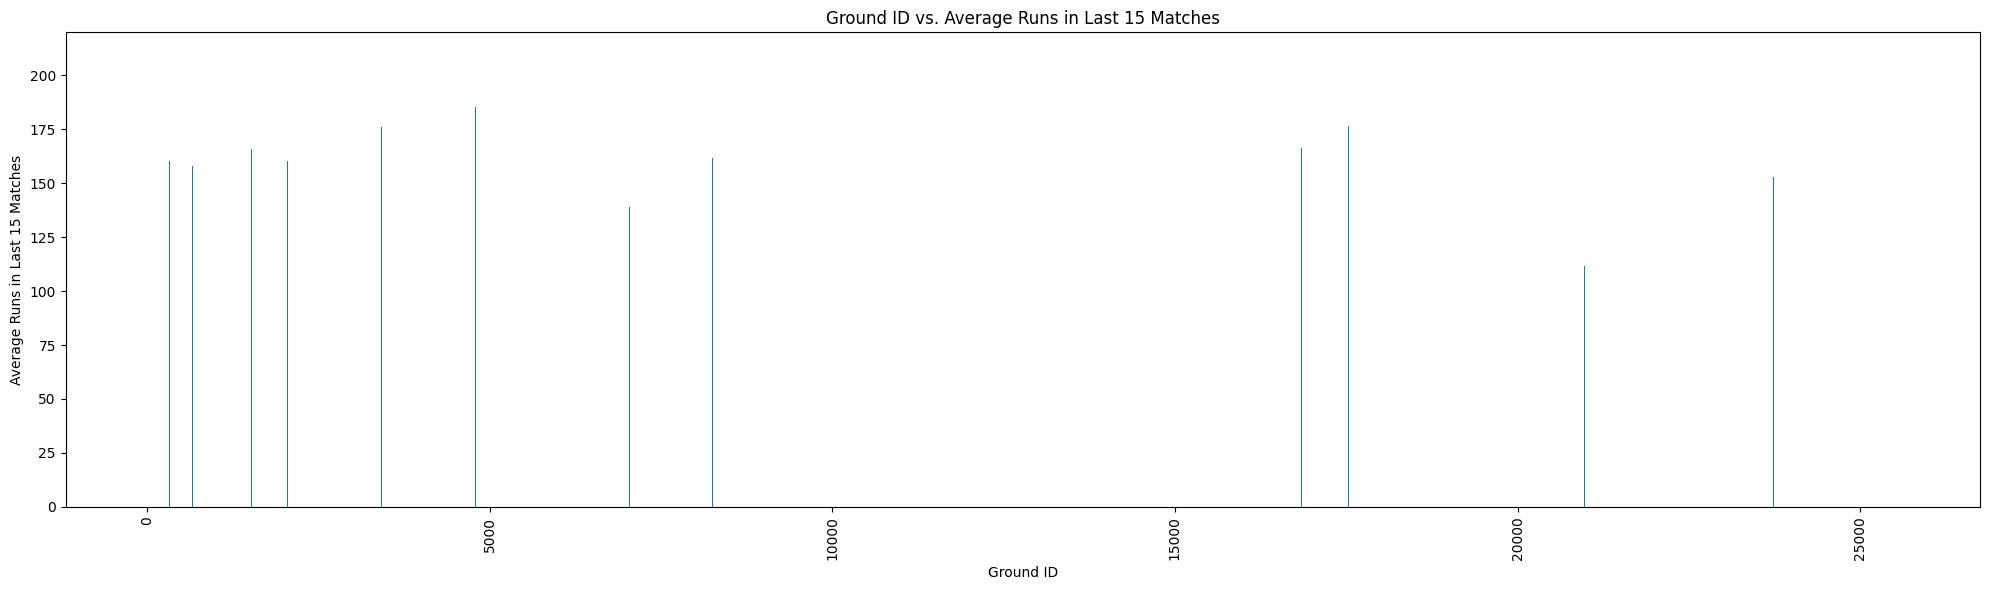

In [9]:
# Create the bar plot
plt.figure(figsize=(20, 6))
plt.bar(non_null_ground_avg['ground_id'], non_null_ground_avg['ground_avg_runs_last15'])

# Add labels and title
plt.xlabel('Ground ID')
plt.ylabel('Average Runs in Last 15 Matches')
plt.title('Ground ID vs. Average Runs in Last 15 Matches')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()   # Show the figure.

In [10]:
non_null_ground_avg['ground_id'].nunique()

111

C:\Users\RDRL\AppData\Local\Temp\ipykernel_26576\1327751762.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_null_ground_avg['ground_id'] = non_null_ground_avg['ground_id'].astype(str)


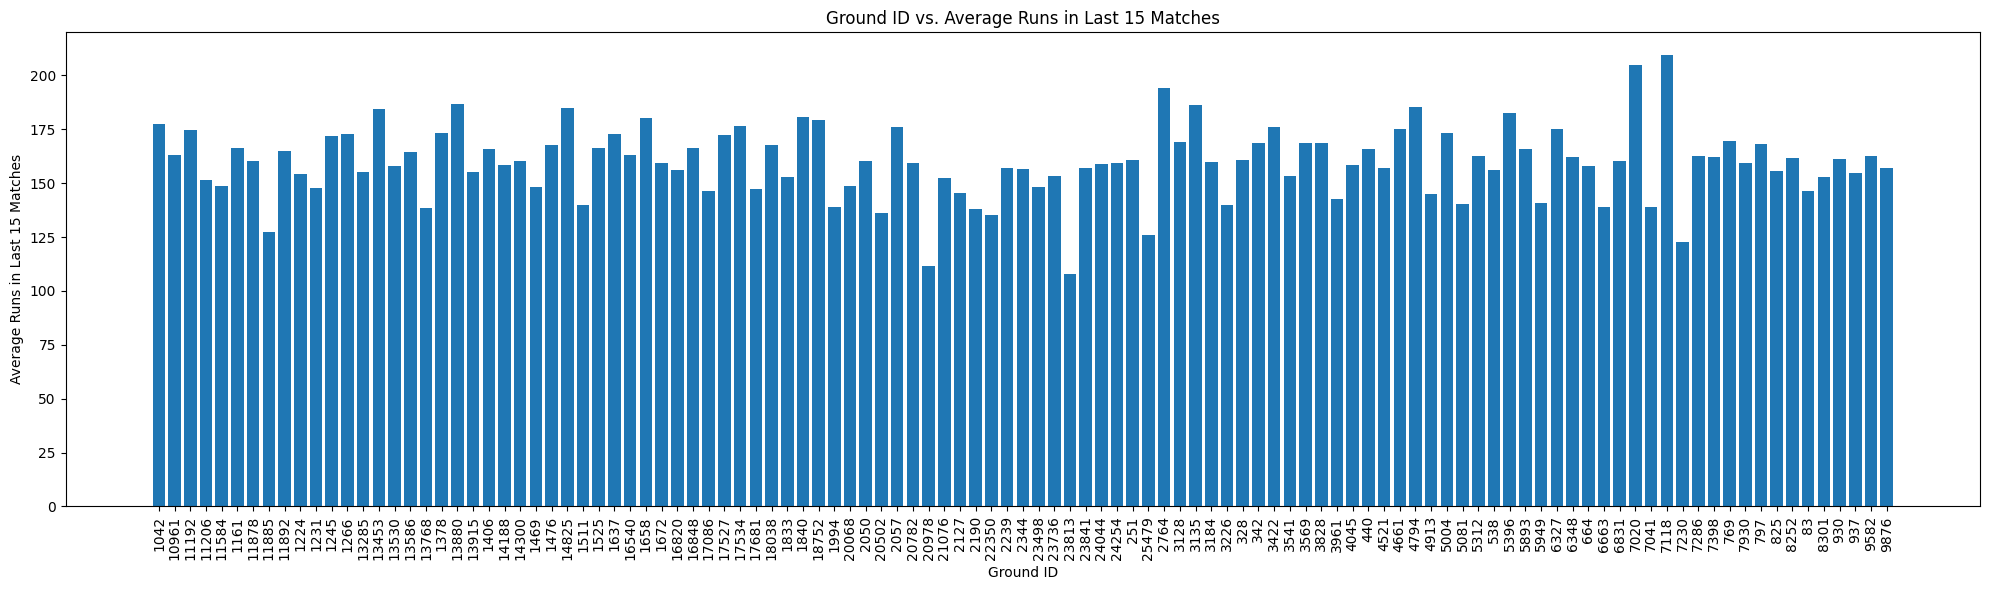

In [11]:

# Assuming the DataFrame is named df
# Filter out the rows where ground_avg_runs_last15 is not null
non_null_ground_avg = data[~data['ground_avg_runs_last15'].isnull()]

# Convert ground_id to string for better categorical handling in the plot
non_null_ground_avg['ground_id'] = non_null_ground_avg['ground_id'].astype(str)

# Sort the DataFrame by ground_id
non_null_ground_avg_sorted = non_null_ground_avg.sort_values(by='ground_id', ascending=True)

# Create the bar plot
plt.figure(figsize=(20, 6))
plt.bar(non_null_ground_avg_sorted['ground_id'], non_null_ground_avg_sorted['ground_avg_runs_last15'])

# Add labels and title
plt.xlabel('Ground ID')
plt.ylabel('Average Runs in Last 15 Matches')
plt.title('Ground ID vs. Average Runs in Last 15 Matches')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()


C:\Users\RDRL\AppData\Local\Temp\ipykernel_26576\2523829125.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_null_ground_avg['ground_id'] = non_null_ground_avg['ground_id'].astype(str)


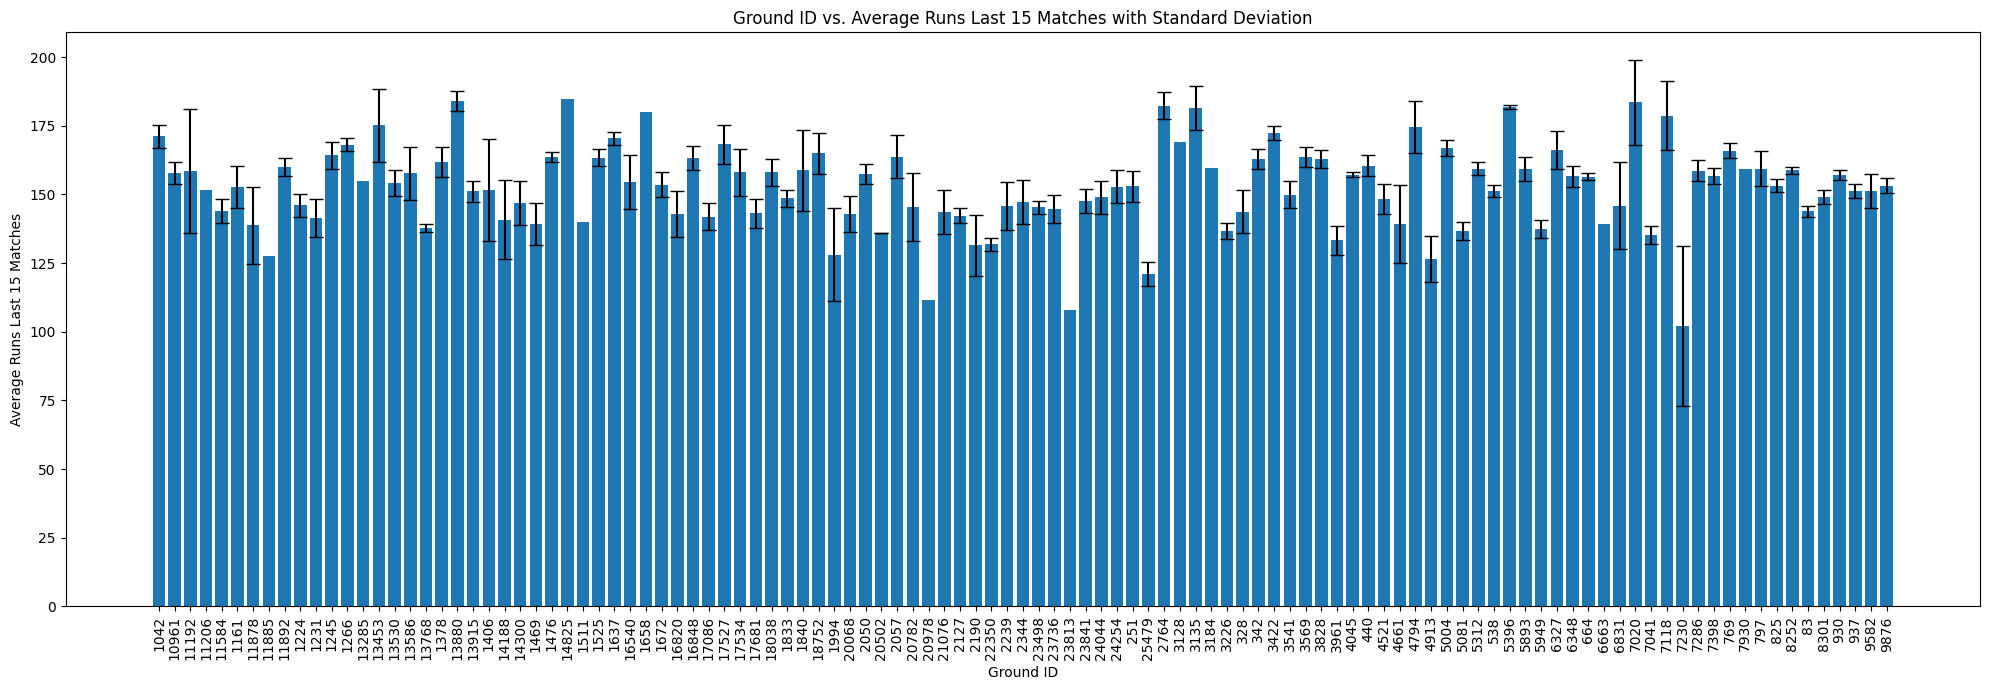

In [12]:

# Filter out the rows where ground_avg_runs_last15 is not null
non_null_ground_avg = data[~data['ground_avg_runs_last15'].isnull()]

# Convert ground_id to string for better categorical handling in the plot
non_null_ground_avg['ground_id'] = non_null_ground_avg['ground_id'].astype(str)

# Group by ground_id and calculate the mean and standard deviation
ground_stats = non_null_ground_avg.groupby('ground_id')['ground_avg_runs_last15'].agg(['mean', 'std']).reset_index()

# Create the bar plot with error bars for standard deviation
plt.figure(figsize=(20, 7))
plt.bar(ground_stats['ground_id'], ground_stats['mean'], yerr=ground_stats['std'], capsize=5)

# Add labels and title
plt.xlabel('Ground ID')
plt.ylabel('Average Runs Last 15 Matches')
plt.title('Ground ID vs. Average Runs Last 15 Matches with Standard Deviation')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948 entries, 0 to 947
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   match id                   948 non-null    int64  
 1   team1                      948 non-null    object 
 2   team1_id                   948 non-null    int64  
 3   team1_roster_ids           948 non-null    object 
 4   team2                      948 non-null    object 
 5   team2_id                   948 non-null    int64  
 6   team2_roster_ids           948 non-null    object 
 7   winner                     948 non-null    object 
 8   winner_id                  948 non-null    int64  
 9   toss winner                948 non-null    object 
 10  toss decision              948 non-null    object 
 11  venue                      948 non-null    object 
 12  city                       948 non-null    object 
 13  match_dt                   948 non-null    object 

In [14]:

# Create a dictionary to store the number of unique values for each column
unique_values = {column: data[column].nunique() for column in data.columns}

# Determine the maximum length of the column names for alignment
max_column_name_length = max(len(column) for column in data.columns)

# Print the number of unique values for each column with proper alignment
print(f'{"Column Name".ljust(max_column_name_length)} : Number of Unique Values')
print('-' * (max_column_name_length + 30))  # Separator line for better readability

for column, unique_count in unique_values.items():
    print(f'{column.ljust(max_column_name_length)} : {unique_count}')


Column Name               : Number of Unique Values
-------------------------------------------------------
match id                  : 948
team1                     : 143
team1_id                  : 152
team1_roster_ids          : 935
team2                     : 141
team2_id                  : 150
team2_roster_ids          : 924
winner                    : 133
winner_id                 : 139
toss winner               : 141
toss decision             : 2
venue                     : 125
city                      : 114
match_dt                  : 485
lighting                  : 3
series_name               : 85
season                    : 5
ground_id                 : 123
team_count_50runs_last15  : 215
team_winp_last5           : 63
team1only_avg_runs_last15 : 637
team1_winp_team2_last15   : 11
ground_avg_runs_last15    : 679
